In [69]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy as sp
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM
from keras.layers.core import Reshape, Dropout
import os

In [70]:
def makeCyclesData():
    array = len(a[fileName][0, 0][0][0])
    print array
    for i in range(616):
        numbOfFeat=len(a[fileName][0, 0][0][0][i][3][0][0])
        typeCycle=a[fileName][0, 0][0][0][i][0][0]
        if (typeCycle=="impedance"):
            continue
        print typeCycle
        newDS=open("d1/"+fileName+"/"+str(i)+"_"+typeCycle+".csv", "w")
        numbOfVect=len(a[fileName][0, 0][0][0][i][3][0][0][0][0])
        for k in range(numbOfVect):
            if (k>0):
                newDS.write("\n")
            for j in range(numbOfFeat):
                if (j>0):
                    newDS.write(";")
                if (typeCycle=="discharge" and j==6):
                    newDS.write(str(a[fileName][0, 0][0][0][i][3][0][0][j][0][0]))
                    continue
                newDS.write(str(a[fileName][0, 0][0][0][i][3][0][0][j][0][k]))
        newDS.close()

In [71]:
def graphicsCycles():
    dataset = pd.read_csv('base_data/B0005/1_discharge.csv', delimiter=';', header=0) 
    dataset = dataset.as_matrix()
    array1=dataset[10:-20,5] # time
    array2=dataset[10:-20,1] # cm
    plt.plot(array1, array2)


In [72]:
def graphicsCars():
    dataset = pd.read_csv('data/380.csv', delimiter=',', header=0) 
    dataset = dataset.as_matrix()
    array1=dataset[:,1] # time
    array2=dataset[:,2] # 
    array3=dataset[:,5] # 
    plt.plot(array1, array2, color="black")
    plt.show()
    plt.plot(array1, array3, color="red")


In [73]:
def graphicsCars():
    dataset = pd.read_csv('data/380.csv', delimiter=',', header=0) 
    dataset = dataset.as_matrix()
    array1=dataset[:,1] # time
    array2=dataset[:,2] # 
    array3=dataset[:,5] # 
    plt.plot(array1, array2, color="black")
    plt.show()
    plt.plot(array1, array3, color="red")


In [74]:
def graphicsCars():
    dataset = pd.read_csv('data/380.csv', delimiter=',', header=0) 
    dataset = dataset.as_matrix()
    array1=dataset[:,1] # time
    array2=dataset[:,2] # 
    array3=dataset[:,5] # 
    plt.plot(array1, array2, color="black")
    plt.show()
    plt.plot(array1, array3, color="red")


In [75]:
def makeDatasetsForCapasity(xS, xVect):
    pathDS="data"+str(xS)+"x"+str(xVect*6)+"/"
    if (not os.path.exists(pathDS)):
        os.mkdir(pathDS)
    makeYDatasetsForCapasity(xS, pathDS)
    makeXDatasetsForCapasity(xS, xVect, pathDS)
def makeYDatasetsForCapasity(xS, pathDS):
    fileName="B0006"
    a = loadmat("base_data/"+fileName+".mat")
    array=[]
    newDS=open(pathDS+"y_train.csv", "w")
    for i in range(616):
        numbOfFeat=len(a[fileName][0, 0][0][0][i][3][0][0])
        typeCycle=a[fileName][0, 0][0][0][i][0][0]
        if (not typeCycle=="discharge"):
            continue
        for h in range(xS):
            newDS.write(str(a[fileName][0, 0][0][0][i][3][0][0][6][0][0]))
            newDS.write("\n")
        array.append(a[fileName][0, 0][0][0][i][3][0][0][6][0][0])
    print len(array)
    newDS.close()
    #plt.plot(np.linspace(0, len(array), len(array)), array)
    fileName="B0018"
    a = loadmat("base_data/"+fileName+".mat")
    array=[]
    newDS=open(pathDS+"y_test.csv", "w")
    for i in range(319):
        numbOfFeat=len(a[fileName][0, 0][0][0][i][3][0][0])
        typeCycle=a[fileName][0, 0][0][0][i][0][0]
        if (not typeCycle=="discharge"):
            continue
        newDS.write(str(a[fileName][0, 0][0][0][i][3][0][0][6][0][0]))
        if (not i==613):
            newDS.write("\n")
        array.append(a[fileName][0, 0][0][0][i][3][0][0][6][0][0])
    print len(array)
    newDS.close()
#plt.plot(np.linspace(0, len(array), len(array)), array)
def makeXDatasetsForCapasity(xS, xVect, pathDS):
    fileName="B0006"
    a = loadmat("base_data/"+fileName+".mat")
    array=[]
    newDS=open(pathDS+"xd_train.csv", "w")
    for i in range(616):
        numbOfFeat=len(a[fileName][0, 0][0][0][i][3][0][0])
        numbOfVect=len(a[fileName][0, 0][0][0][i][3][0][0][0][0])    
        typeCycle=a[fileName][0, 0][0][0][i][0][0]
        if (not typeCycle=="discharge"):
            continue
        print i, numbOfVect
        ar=np.linspace(0, numbOfVect-1, xVect, dtype=int)
        for h in range(xS):
            for j in ar:
                for k in range (6): 
                    newDS.write(str(a[fileName][0, 0][0][0][i][3][0][0][k][0][j]))
                    if (not (j==ar[-1] and k==5)):
                        newDS.write(";")
            newDS.write("\n")
        #array.append(a[fileName][0, 0][0][0][i][3][0][0][6][0][0])
    #print len(array)
    newDS.close()
    #plt.plot(np.linspace(0, len(array), len(array)), array)
    fileName="B0018"
    a = loadmat("base_data/"+fileName+".mat")
    array=[]
    newDS=open(pathDS+"xd_test.csv", "w")
    for i in range(319):
        numbOfFeat=len(a[fileName][0, 0][0][0][i][3][0][0])
        numbOfVect=len(a[fileName][0, 0][0][0][i][3][0][0][0][0])    
        #print numbOfVect
        typeCycle=a[fileName][0, 0][0][0][i][0][0]
        if (not typeCycle=="discharge"):
            continue
        ar=np.linspace(0, numbOfVect-1, xVect, dtype=int)
        for j in ar:
            for k in range (6): 
                newDS.write(str(a[fileName][0, 0][0][0][i][3][0][0][k][0][j]))
                if (not (j==ar[-1] and k==5)):
                    newDS.write(";")
        newDS.write("\n")
        #array.append(a[fileName][0, 0][0][0][i][3][0][0][6][0][0])
    #print len(array)
    newDS.close()
#plt.plot(np.linspace(0, len(array), len(array)), array)


In [76]:
def importData(path):
    X_train = pd.read_csv(str(path)+'/xd_train.csv', delimiter=';', header=None)
    y_train=pd.read_csv(str(path)+'/y_train.csv', header=None)
    X_test=pd.read_csv(str(path)+'/xd_test.csv', delimiter=';', header=None)
    y_test=pd.read_csv(str(path)+'/y_test.csv', header=None)
    return X_train, y_train, X_test, y_test
def normalizeData(X_train, X_test):
    X_train = (X_train - X_train.mean()) / X_train.std()
    X_test = (X_test - X_test.mean())/X_test.std()
    return X_train, X_test


In [77]:
def LSTMRes(X_train, X_test, y_train, y_test, vect):
    X_train, X_test, y_train, y_test= X_train.as_matrix(), X_test.as_matrix(), y_train.as_matrix(), y_test.as_matrix()
    model = Sequential()
    model.add(Dense(60, input_shape=(vect,)))
    model.add(Reshape((60,1)))
    model.add(LSTM(60, return_sequences=True))
    model.add(LSTM(60, dropout=0.3, recurrent_dropout=0.32))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    print(model.summary())
    model.fit(X_train, y_train, epochs=5)# validation_data=(X_test, y_test))    zLSMT = model.predict_proba(X_test)
    zLSMT = model.predict(X_test)
    y_res=open('y_testLSTM.csv', 'w')
    y_res.write('\n'.join(str(v[0]) for v in zLSMT))  
    return zLSMT


In [78]:
def runLSTM(xS, xVect):
    np.random.seed(42)
    x_train, y_train, x_test, y_test = importData('data'+str(xS)+'x'+str(xVect))
    res = LSTMRes(x_train, x_test, y_train, y_test, xVect)
    print(mean_squared_error(res, y_test))
    #plt.figure(figsize=(15,15))
    plt.plot(np.linspace(0, 132, 132), res)
    plt.plot(np.linspace(0, 132, 132), y_test)
    plt.show()

In [79]:
def graphicTimeCapas(fileName="B0006"):
    a = loadmat("base_data/"+fileName+".mat")
    arrayTime=[]
    arrayCapas=[]
    for i in range(616):
        numbOfFeat=len(a[fileName][0, 0][0][0][i][3][0][0])
        numbOfVect=len(a[fileName][0, 0][0][0][i][3][0][0][0][0])    
        typeCycle=a[fileName][0, 0][0][0][i][0][0]
        if (not typeCycle=="discharge"):
            continue
        arrayTime.append(a[fileName][0, 0][0][0][i][3][0][0][5][0][numbOfVect-1])
        arrayCapas.append(a[fileName][0, 0][0][0][i][3][0][0][6][0][0])
    plt.plot(arrayCapas, arrayTime)
            

In [80]:
def main():
    makeDatasetsForCapasity(5, 5)
    runLSTM(5, 5*6)
    #graphicTimeCapas()
    

168
132
1 197
3 196
5 195
7 194
9 194
11 195
13 195
15 191
17 190
19 190
21 189
24 187
26 186
28 186
30 185
32 184
34 183
36 182
38 182
41 192
45 190
49 189
53 187
57 188
61 184
65 184
69 183
73 183
77 183
81 182
85 371
89 365
93 363
97 362
101 360
105 360
109 359
113 357
117 356
121 355
125 355
129 354
133 179
135 354
139 352
143 350
147 349
149 356
153 356
157 353
161 351
165 350
169 349
173 349
177 348
181 347
185 346
189 346
193 345
197 345
201 343
205 343
209 342
213 341
215 341
219 340
223 339
227 338
231 338
235 337
239 336
243 336
247 335
251 334
255 333
259 333
263 333
265 333
269 331
273 330
277 330
281 330
285 329
289 329
293 327
297 326
301 326
305 326
309 325
312 339
315 329
319 328
323 327
327 326
331 325
335 324
339 324
343 323
347 322
351 322
355 321
359 320
363 321
366 322
370 320
374 319
378 316
382 318
386 317
390 317
394 316
398 315
402 315
406 315
410 314
414 313
418 312
422 312
426 312
430 314
432 315
436 313
440 312
444 311
448 311
452 309
456 309
460 309
464 308

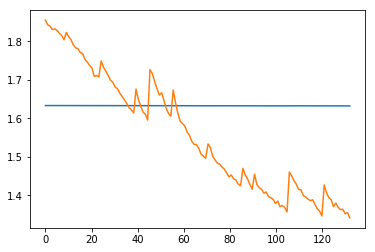

In [81]:
main()